# Packages used

In [1]:
import numpy as np 
from astropy.io import fits
import matplotlib.pyplot as plt 

# Load file

In [2]:
caminho = 'combined_20250520_040914.fits'

# Data processing  

In [3]:
# Opening the file 
hdul = fits.open(caminho) 
data = hdul[0].data

# Processing
stokes = np.copy(data)
stokes = stokes.astype("float64")  

I_qs = np.mean(stokes[:,:,0,:10]) 
stokes /= I_qs

In [4]:
#  Adjusment to instrument wavelengths
NL = 112
ll = np.linspace(0,NL-1,NL)
ll = (6300.875156521739 + ll * 0.021573913043480192 )

## Intensity Map (Continuum)

In [5]:
plt.figure(figsize=[18, 10])

plt.imshow(stokes[:,:,0,0], origin='lower', cmap='gray', vmin=0, vmax=1.4, aspect='equal')

# Three points represented on the plot by the symbol +
plt.plot(460, 175, 'r+', ms= 20)
plt.plot(460, 140 ,'g+', ms= 20)
plt.plot(460, 220 ,'b+', ms= 20)

plt.colorbar()  
plt.title("Continuum intensity map", fontsize= 20, pad= 15)
plt.tick_params(axis='both', which='major', labelsize=14)

plt.grid()
#plt.savefig('Continnum intensity map.png', dpi=300, transparent=True, bbox_inches='tight')  

plt.show()

In [6]:
px = 460
py = 140

## Stokes profiles for 1 pixel (112 wavelength)

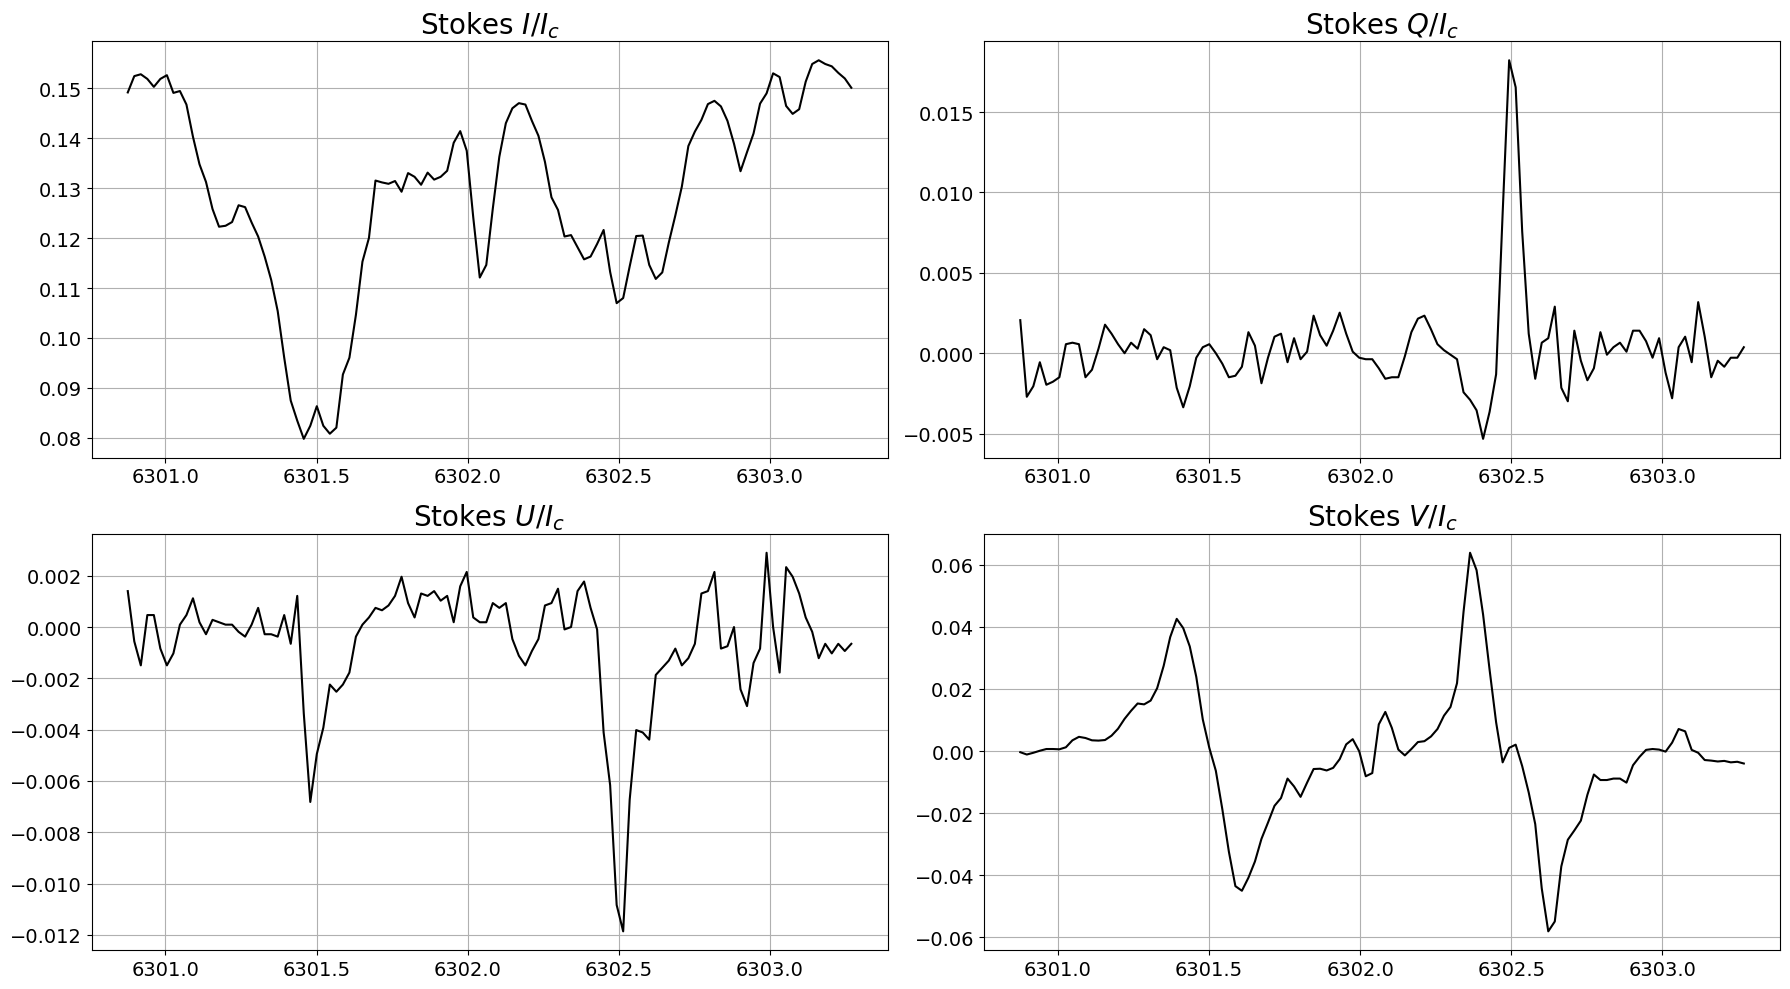

In [7]:
fig, axs = plt.subplots(2, 2, figsize=[18,10])

plt.title("Continuum intensity map")

# Stokes I/I_c
axs[0,0].plot(ll, stokes[int(py), int(px), 0,:], color = 'k' )
axs[0,0].grid()

# Stokes Q/I_c
axs[0,1].plot(ll, stokes[int(py), int(px), 1,:], color = 'k')
axs[0,1].grid()

# Stokes U/I_c
axs[1,0].plot(ll, stokes[int(py), int(px), 2,:], color = 'k')
axs[1,0].grid()

# Stokes V/I_c
axs[1,1].plot(ll, stokes[int(py), int(px), 3,:], color = 'k')
axs[1,1].grid()

axs[0,0].set_title("Stokes $I/I_c$", fontsize= 20)
axs[0,0].tick_params(axis='both', which='major', labelsize=14)
axs[0,1].set_title("Stokes $Q/I_c$", fontsize= 20)
axs[0,1].tick_params(axis='both', which='major', labelsize=14)
axs[1,0].set_title("Stokes $U/I_c$", fontsize= 20)
axs[1,0].tick_params(axis='both', which='major', labelsize=14)
axs[1,1].set_title("Stokes $V/I_c$", fontsize= 20)
axs[1,1].tick_params(axis='both', which='major', labelsize=14)

fig.tight_layout()
#plt.savefig('Stokes_IQUV_POINTS.png', dpi=300, transparent=True, bbox_inches='tight')
plt.show()

In [8]:
# wavelength index
ind_wl = 30 

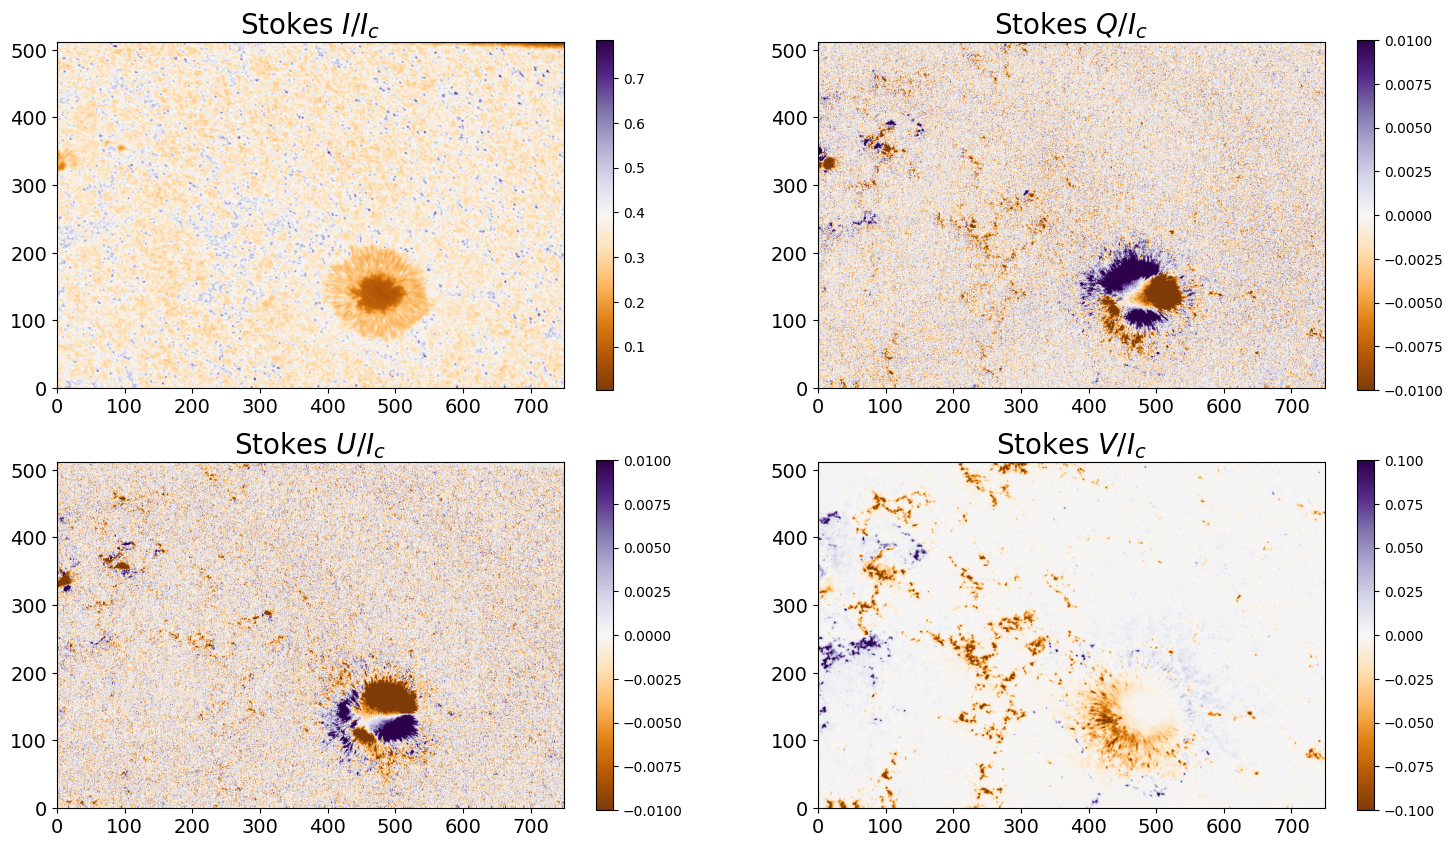

In [9]:
plt.figure(figsize=[18,10])

# Stokes I
plt.subplot(221)
plt.imshow(stokes[:,:,0, ind_wl],origin='lower',cmap='PuOr')
plt.colorbar()
plt.title("Stokes $I/I_c$", fontsize= 20)
plt.tick_params(axis='both', which='major', labelsize=14)

# Stokes Q
plt.subplot(222)
plt.imshow(stokes[:,:,1, ind_wl],origin='lower',cmap='PuOr',vmin=-0.01,vmax=0.01)
plt.colorbar()
plt.title("Stokes $Q/I_c$", fontsize= 20)
plt.tick_params(axis='both', which='major', labelsize=14)

# Stokes U
plt.subplot(223)
plt.imshow(stokes[:,:,2, ind_wl],origin='lower',cmap='PuOr',vmin=-0.01,vmax=0.01)
plt.colorbar()
plt.title("Stokes $U/I_c$", fontsize= 20)
plt.tick_params(axis='both', which='major', labelsize=14)

# Stokes V
plt.subplot(224)
plt.imshow(stokes[:,:,3, ind_wl],origin='lower',cmap='PuOr', vmin=-0.1,vmax=0.1)
plt.colorbar()
plt.title("Stokes $V/I_c$", fontsize= 20)
plt.tick_params(axis='both', which='major', labelsize=14)

plt.show()

# Temperature Map

> The mean continuum intensity can be approximated by the Planck function evaluates at a temperature equal to the effective temperature of the Sun (5778 K).


##  $$\Delta T = \dfrac{\lambda k_b}{hc}\dfrac{I_c-\bar{I}_c}{\bar{I}_c} T^2$$

### Constants

In [10]:
k   = 1.380649E-23 
h   = 6.62607015E-34
c   = 299792458
La  = 6301.5
T   = 5788

In [11]:
I_mean  = np.mean(stokes[:, :, 0, 0:10])

Delta_T = 1E-10*(La*k*T**2)/(h*c)

line_T = np.zeros([stokes.shape[0],stokes.shape[1]])

for i in range(0,stokes.shape[0]):
    
    for j in range(0,stokes.shape[1]):
        
        line_T[i,j] = Delta_T*((np.mean(stokes[i, j, 0, 0:10]) - I_mean)/ I_mean) + T

## Plot

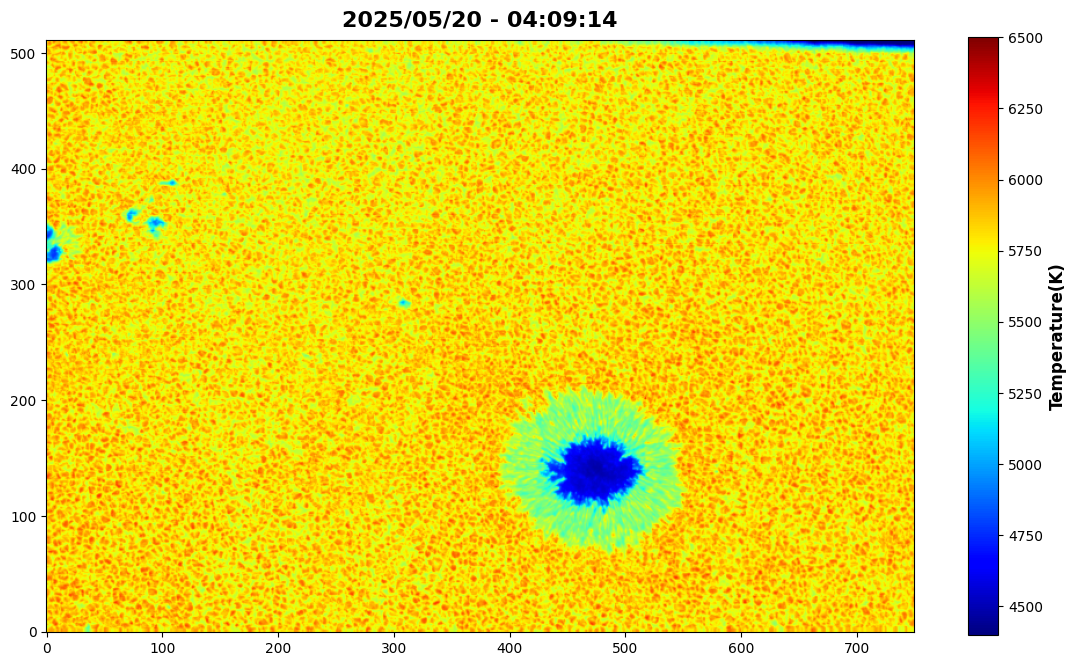

In [12]:
plt.figure(figsize=[14, 8])

plt.imshow(line_T, origin='lower', cmap='jet', vmin=4400, vmax=6500, aspect='equal')

plt.title(caminho[9:13]+'/'+ caminho[13:15]+'/'+ caminho[15:17]+
          ' - ' + caminho[-11:-9]+':'+caminho[-9:-7]+':'+caminho[-7:-5],weight='bold', fontsize= 16, pad= 10)
cbar = plt.colorbar(shrink=0.97)
cbar.set_label('Temperature(K)', fontsize=12, weight='bold')

#plt.savefig('Results/'+ 'Temperature_Map_'+'AR11158_'+caminho[-11:-9]+'_'+caminho[-9:-7]+'_'+caminho[-7:-5]+'_mean.png', dpi=300, transparent=True, bbox_inches='tight')
plt.show()